In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [121]:
data = pd.read_csv("/content/drive/MyDrive/Clustering/german_credit_data.csv") ## read data into dataframe


In [122]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


# EDA

In [123]:
data.shape

(1000, 10)

In [124]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [125]:
data.describe(include=['object'])

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Check null data

In [127]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [128]:
data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

In [129]:
data=data.drop("Unnamed: 0",axis=1)

Fill in null values

In [130]:
data['Saving accounts'] = data['Saving accounts'].fillna('None')
data['Saving accounts'].value_counts()

little        603
None          183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [131]:
data['Checking account'] = data['Checking account'].fillna('None')
data['Checking account'].value_counts()

None        394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [132]:
data.Purpose.value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [133]:
data['Purpose'].replace(['repairs', 'domestic appliances', 'vacation/others'], 'others', inplace=True)

In [134]:
data.Purpose.value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
others                  46
Name: Purpose, dtype: int64

In [135]:
data.dtypes # understand data type

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

Map job to its meaning

In [136]:
data['Job'].replace([0], 'unskilled and non-resident', inplace=True)
data['Job'].replace([1], 'unskilled and resident', inplace=True)
data['Job'].replace([2], 'skilled', inplace=True)
data['Job'].replace([3], 'highly skilled', inplace=True)
data.dtypes

Age                  int64
Sex                 object
Job                 object
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

## Visuaize attributes

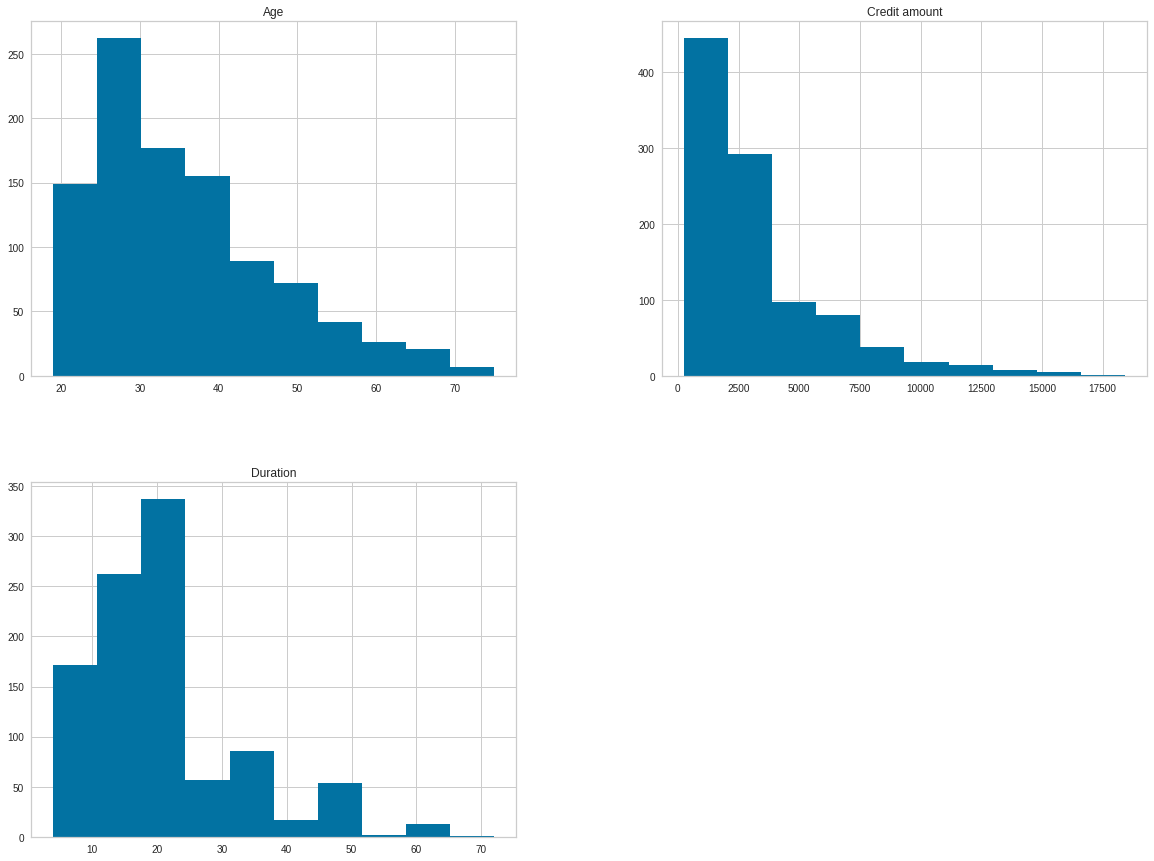

In [137]:
data.hist(figsize = (20,15));

In [138]:
numeric = ['Age', 'Credit amount', 'Duration']
categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

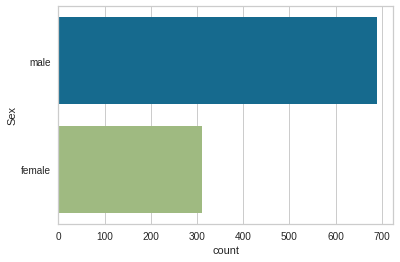

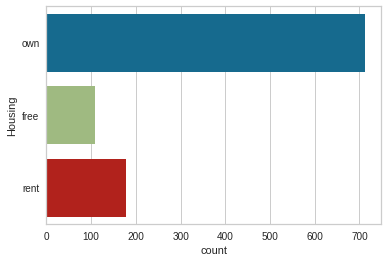

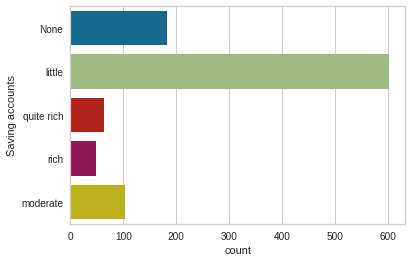

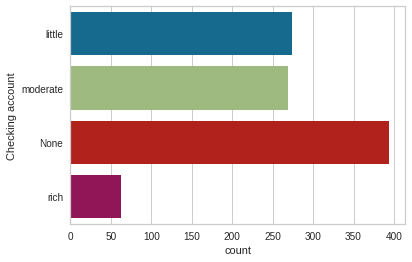

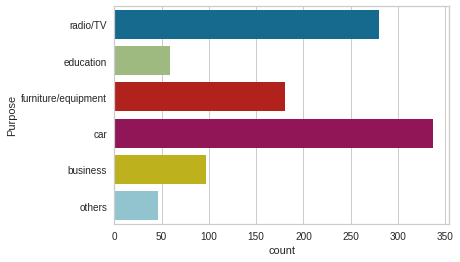

In [139]:
for col in data[categorical].columns:
    sns.countplot(y =col, data = data)
    plt.show()

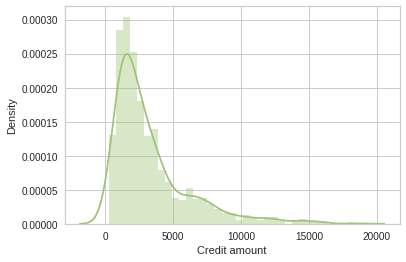

In [140]:
sns.distplot(data['Credit amount'], hist=True,  color='g')

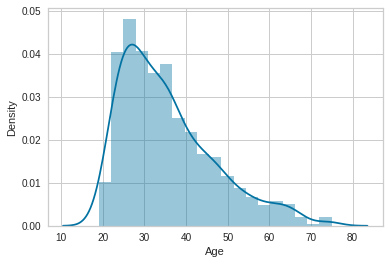

In [141]:
sns.distplot(data['Age'], hist=True, color='b')

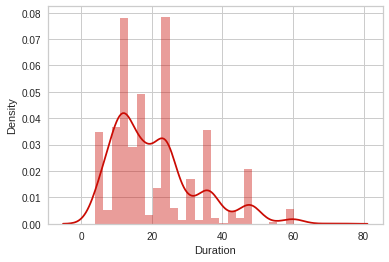

In [142]:
sns.distplot(data['Duration'], hist=True, color='r')

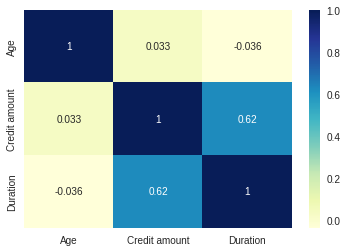

In [143]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


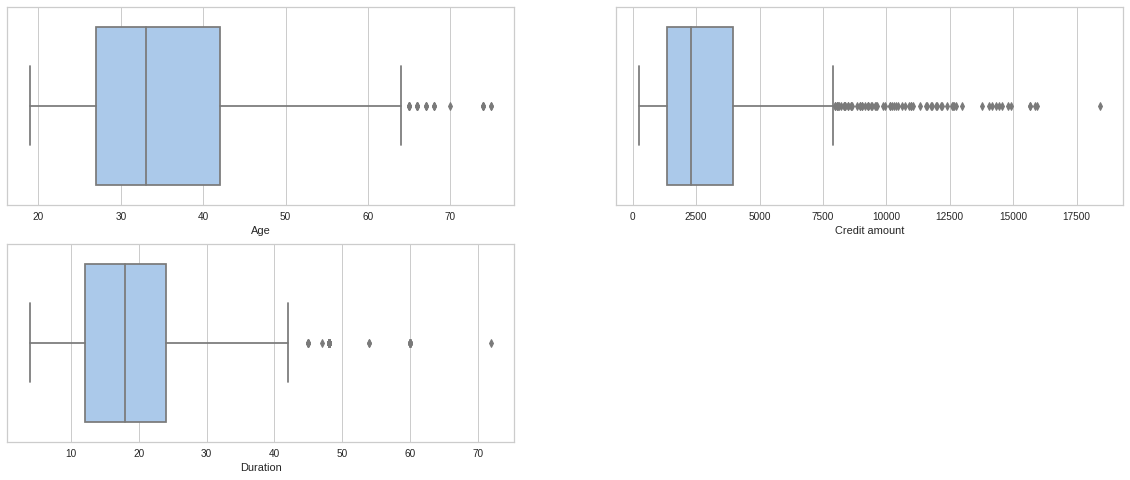

In [144]:
plt.figure(figsize=(20,8))
plotnumber =1
for column in data[numeric]:
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(data = data, x = column, palette='pastel')
    plt.xlabel(column)
    plotnumber+=1
plt.show()

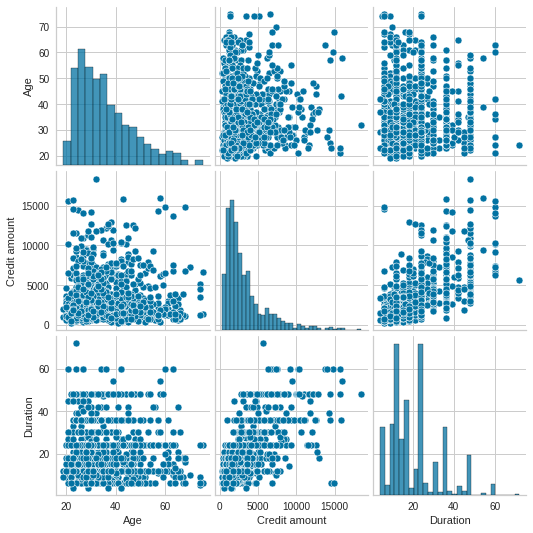

In [145]:
sns.pairplot(data)
plt.show;

Relation b/w attributes

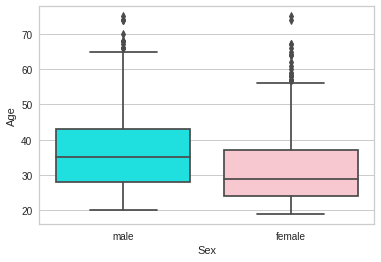

In [146]:
sns.boxplot(x="Sex", y="Age", data=data, palette=["cyan", "pink"])

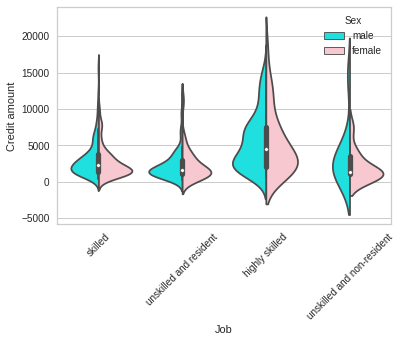

In [147]:
sns.violinplot(data=data, x='Job', y='Credit amount', hue='Sex', palette=["cyan", "pink"], split=True)
plt.xticks(rotation=45)
plt.show()

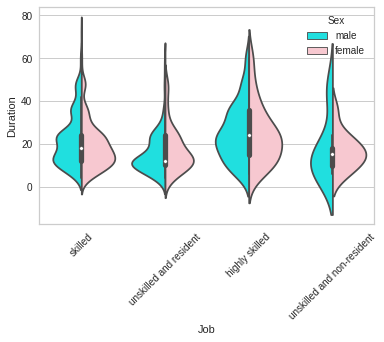

In [148]:
sns.violinplot(data=data, x='Job', y='Duration', hue='Sex', palette=["cyan", "pink"], split=True)
plt.xticks(rotation=45)
plt.show()

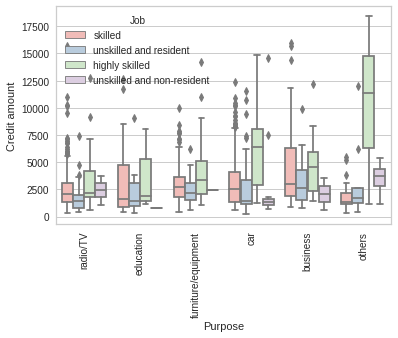

In [149]:
sns.boxplot(x="Purpose", y="Credit amount", hue='Job', data=data, palette="Pastel1", width=.8)
#ax.tick_params(labelrotation=45)
plt.xticks(rotation=90)
plt.show()
# width is the width of box plot not of whole figure

## Model Building

## k-means 

In [150]:
# Cluster column
Cdata = data.loc[:,["Age","Credit amount", "Duration"]] 

In [151]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

## Find k-value: Elbow method

In [152]:
distortions = []
mapping = {}
K = range(1,15) 

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1).fit(Cdata)
    kmeanModel.fit(Cdata)

    distortions.append(sum(np.min(cdist(Cdata, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / Cdata.shape[0]) 
#Distortion: It is calculated as the average of the squared distances 
#from the cluster centers of the respective clusters.
#cdist-Compute distance between each pair of the two collections of inputs.

    mapping[k] = sum(np.min(cdist(Cdata, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / Cdata.shape[0]

In [153]:
for key,val in mapping.items(): 
    print(str(key)+' : '+str(val)) 

1 : 2048.6852740557465
2 : 1175.9819370821397
3 : 910.097395859311
4 : 610.4938530357692
5 : 533.2596805336185
6 : 434.48651577868634
7 : 385.1330754854946
8 : 339.29258817210643
9 : 312.59843537452963
10 : 261.53802880990423
11 : 224.14222593179483
12 : 213.41468734098467
13 : 208.67842763892986
14 : 193.68472302944264


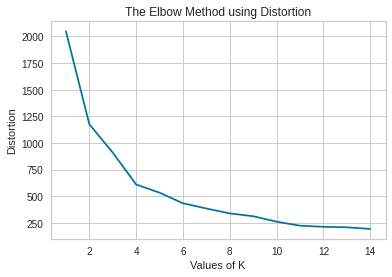

In [154]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

## Silhouette Score

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


In [155]:
from sklearn.metrics import silhouette_score, silhouette_samples
K = range(2,15) 

for k in K:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(Cdata)
    centers = km.cluster_centers_

    score = silhouette_score(Cdata, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.7222445573514608
For n_clusters = 3, silhouette score is 0.6567059590757343
For n_clusters = 4, silhouette score is 0.6116757136591906
For n_clusters = 5, silhouette score is 0.5820693979763408
For n_clusters = 6, silhouette score is 0.5770619536907465
For n_clusters = 7, silhouette score is 0.5777559962944369
For n_clusters = 8, silhouette score is 0.5709929264892205
For n_clusters = 9, silhouette score is 0.5598022331121786
For n_clusters = 10, silhouette score is 0.536172691951022
For n_clusters = 11, silhouette score is 0.5759102344114708
For n_clusters = 12, silhouette score is 0.5753577352216125
For n_clusters = 13, silhouette score is 0.576058066237989
For n_clusters = 14, silhouette score is 0.572188744828566


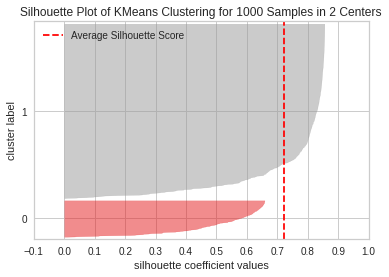

In [156]:
from yellowbrick.cluster import SilhouetteVisualizer

#Instantiate the clustering model and visualizer
km = KMeans (n_clusters=2)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(Cdata) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

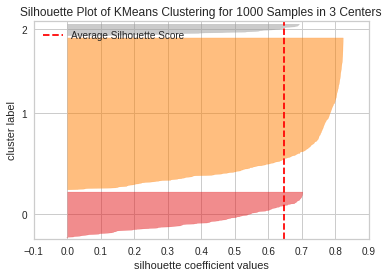

In [157]:
from yellowbrick.cluster import SilhouetteVisualizer

#Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(Cdata) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

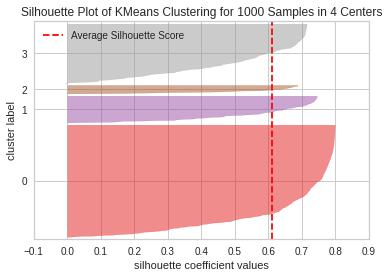

In [158]:
from yellowbrick.cluster import SilhouetteVisualizer

#Instantiate the clustering model and visualizer
km = KMeans (n_clusters=4)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(Cdata) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

# k=3
## Build model

In [159]:
kmeans = KMeans(n_clusters = 3, random_state=1)
kmeans.fit(Cdata)
y_pred3 = kmeans.predict(Cdata)
print(kmeans.cluster_centers_)
#print cluster means

[[   35.30235784  1871.74618585    16.65603329]
 [   35.89830508 11539.01694915    39.16949153]
 [   36.25        5640.57727273    29.92272727]]


In [160]:
data["cluster3"] = kmeans.labels_ 

In [161]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster3
0,67,male,skilled,own,None,little,1169,6,radio/TV,0
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,2
2,49,male,unskilled and resident,own,little,None,2096,12,education,0
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,2
4,53,male,skilled,free,little,little,4870,24,car,2


In [162]:
cluster_sum = data.groupby('cluster3')['Age','Credit amount', 'Duration'].mean()
#cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_sum

,Age,Credit amount,Duration
cluster3,,,
0,35.302358,1871.746186,16.656033
1,35.741379,11589.896552,39.172414
2,36.289593,5653.914027,29.963801


In [163]:
cluster_des = data.groupby('cluster3')['Age','Credit amount', 'Duration'].describe()
#cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_des

Age                                                      \
          count       mean        std   min   25%   50%   75%   max   
cluster3                                                              
0         721.0  35.302358  11.397373  19.0  26.0  33.0  41.0  75.0   
1          58.0  35.741379  11.145860  21.0  27.0  33.0  42.0  68.0   
2         221.0  36.289593  11.380898  20.0  27.0  34.0  42.0  75.0   

         Credit amount                ...                    Duration  \
                 count          mean  ...       75%      max    count   
cluster3                              ...                               
0                721.0   1871.746186  ...   2515.00   3749.0    721.0   
1                 58.0  11589.896552  ...  12731.75  18424.0     58.0   
2                221.0   5653.914027  ...   6761.00   8588.0    221.0   

                                                             
               mean        std  min   25%   50%   75%   max  
cluster3                                                     
0         16.656033   8.330558  4.0  12.0  15.0  24.0  48.0  
1         39.172414  13.294423  6.0  36.0  36.0  48.0  60.0  
2         29.963801  12.562880  6.0  21.0  27.0  36.0  72.0  

[3 rows x 24 columns]

## Visualize clusters

Text(0.5, 0, 'Age')

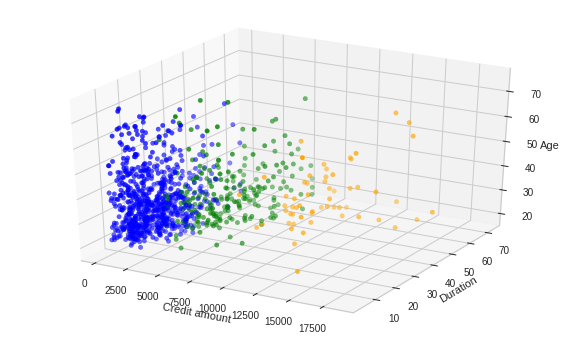

In [164]:
colors = {0:'blue', 1:'orange', 2:'green'}
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"], c=data['cluster3'].map(colors), cmap='jet_r')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")


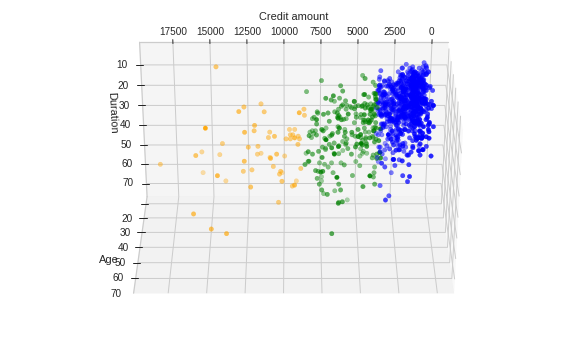

In [165]:
colors = {0:'blue', 1:'orange', 2:'green'}
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"], c=data['cluster3'].map(colors), cmap='jet_r')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
ax.view_init(120, 90)

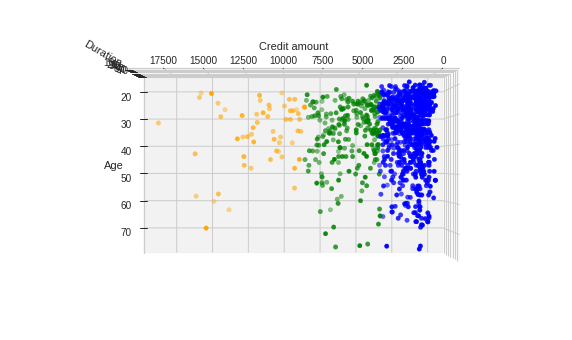

In [166]:
colors = {0:'blue', 1:'orange', 2:'green'}
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"], c=data['cluster3'].map(colors), cmap='jet_r')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
ax.view_init(-360, -90)

## 2-D visualization

In [167]:
import plotly.express as px

In [168]:
fig = px.scatter(data, x='Age', y='Duration', color='cluster3', title="0 (B):AA;VLC;LD ***** 1 (P):YA; HC; HD ***** 2(Y):YMA; MC; HD")
fig.show()

In [169]:
fig = px.scatter(data, x='Age', y='Credit amount', color='cluster3', title="0 (B):AA;VLC;LD ***** 1 (P):YA; HC; HD ***** 2(Y):YMA; MC; HD")
fig.show()

In [170]:
fig = px.scatter(data, x='Duration', y='Credit amount', color='cluster3', title="0 (B):AA;VLC;LD ***** 1 (P):YA; HC; HD ***** 2(Y):YMA; MC; HD")
fig.show()

## Cluster Size

In [171]:
cluster_size = data.groupby(['cluster3'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,cluster3,size,Percentage
0,0,721,0.721
1,1,58,0.058
2,2,221,0.221


In [172]:
# Plot pie chart
fig = px.pie(cluster_size, values='Percentage', names='cluster3', 
             color_discrete_sequence=px.colors.sequential.RdBu, width=800, height=500,
            title='Size of Each Cluster')
fig.show()

## Distribution in Clusters

In [173]:
cluster0 = data[data['cluster3']==0]
cluster1 = data[data['cluster3']==1]
cluster2 = data[data['cluster3']==2]

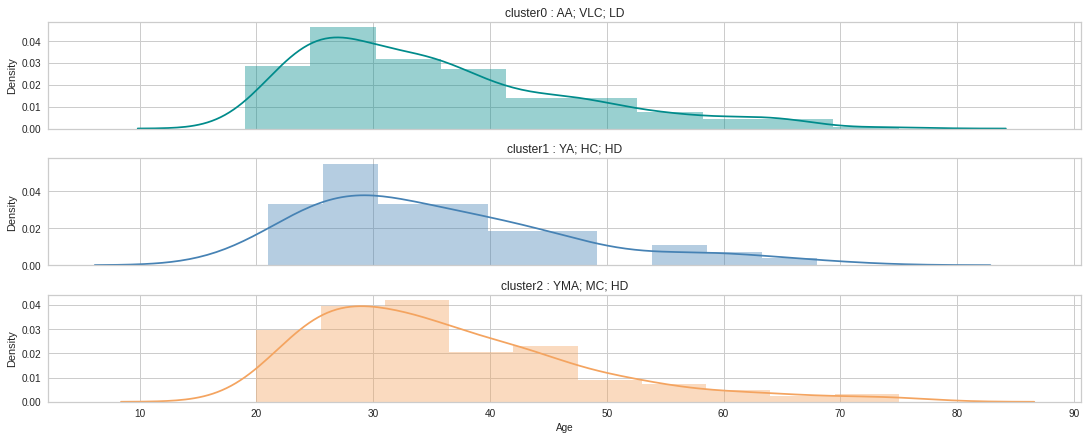

In [174]:
fig, ax = plt.subplots(3,1,figsize=(15,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('cluster0 : AA; VLC; LD')
ax[1].title.set_text('cluster1 : YA; HC; HD')
ax[2].title.set_text('cluster2 : YMA; MC; HD')


ax[0].axes.xaxis.set_visible(True)
ax[1].axes.xaxis.set_visible(True)
ax[2].axes.xaxis.set_visible(True)

plt.xlabel('Age', fontsize=10)
sns.distplot(cluster0['Age'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(cluster1['Age'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(cluster2['Age'], color='sandybrown', bins=10, ax=ax[2])



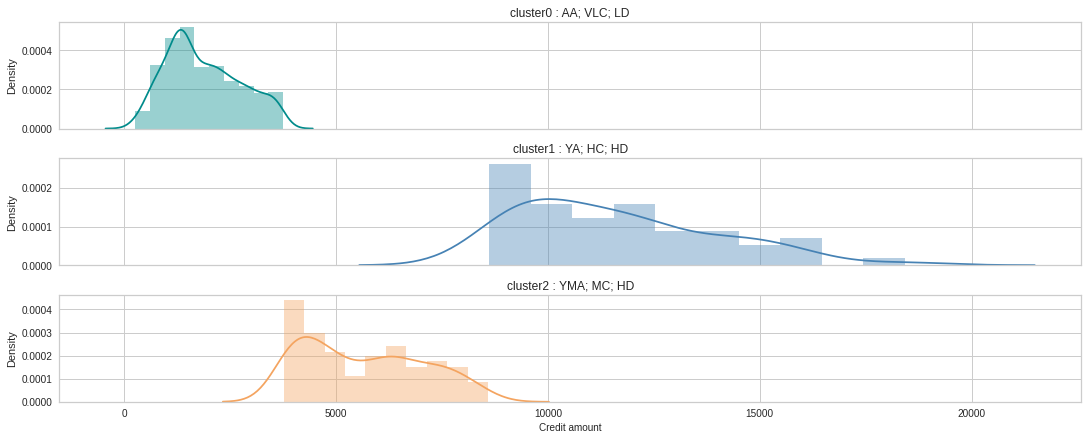

In [175]:
fig, ax = plt.subplots(3,1,figsize=(15,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('cluster0 : AA; VLC; LD')
ax[1].title.set_text('cluster1 : YA; HC; HD')
ax[2].title.set_text('cluster2 : YMA; MC; HD')


ax[0].axes.xaxis.set_visible(True)
ax[1].axes.xaxis.set_visible(True)
ax[2].axes.xaxis.set_visible(True)

plt.xlabel('Credit amount', fontsize=10)
sns.distplot(cluster0['Credit amount'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(cluster1['Credit amount'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(cluster2['Credit amount'], color='sandybrown', bins=10, ax=ax[2])


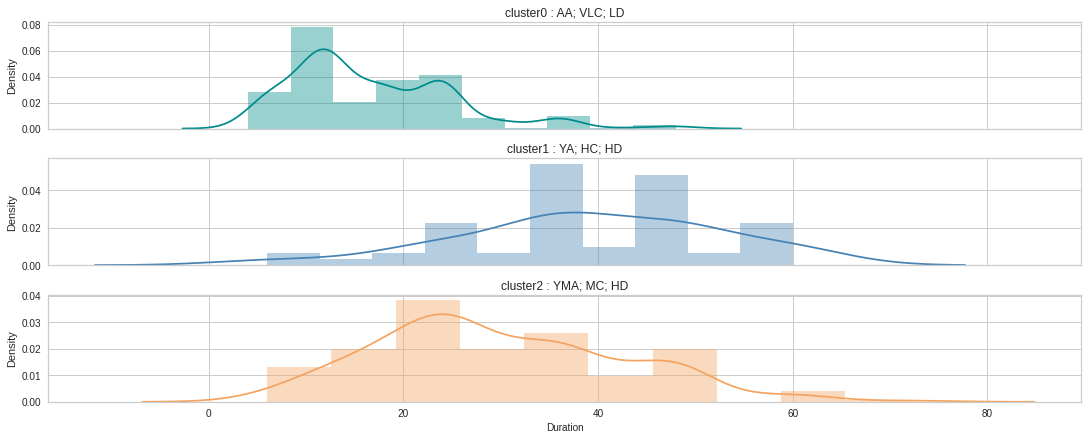

In [176]:
fig, ax = plt.subplots(3,1,figsize=(15,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('cluster0 : AA; VLC; LD')
ax[1].title.set_text('cluster1 : YA; HC; HD')
ax[2].title.set_text('cluster2 : YMA; MC; HD')


ax[0].axes.xaxis.set_visible(True)
ax[1].axes.xaxis.set_visible(True)
ax[2].axes.xaxis.set_visible(True)


sns.distplot(cluster0['Duration'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(cluster1['Duration'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(cluster2['Duration'], color='sandybrown', bins=10, ax=ax[2])
plt.xlabel('Duration', fontsize=10)


plt.show()


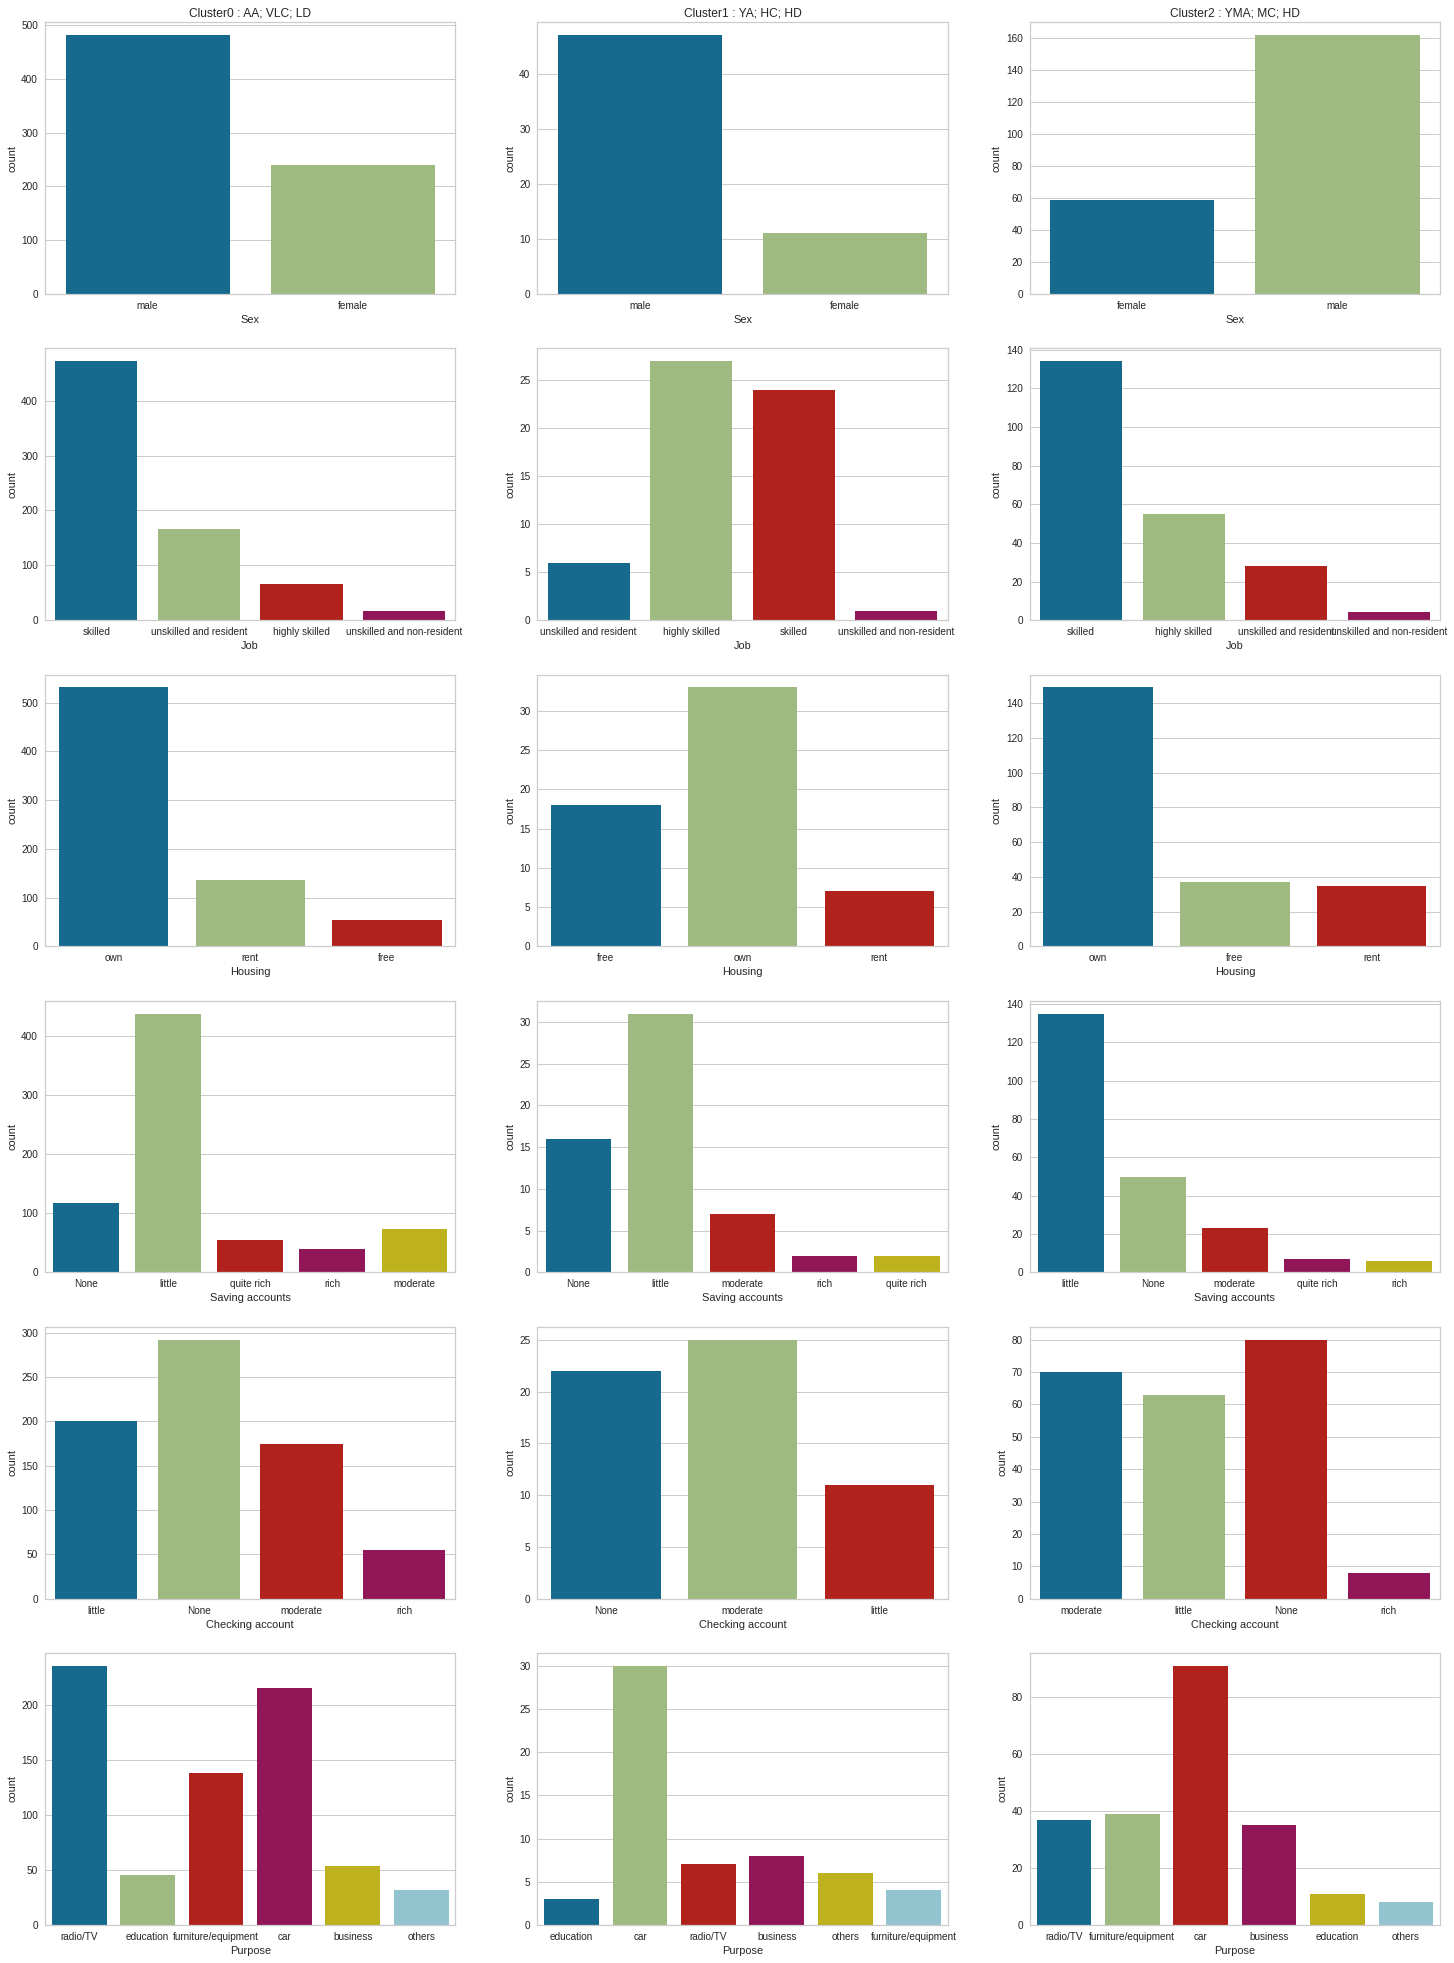

In [177]:
fig, ax = plt.subplots(6,3,figsize=(25,35))

ax[0][0].title.set_text('Cluster0 : AA; VLC; LD')
ax[0][1].title.set_text('Cluster1 : YA; HC; HD')
ax[0][2].title.set_text('Cluster2 : YMA; MC; HD')

sns.countplot(x ='Sex', data = data[data['cluster3']==0], ax=ax[0][0])
sns.countplot(x ='Sex', data = data[data['cluster3']==1], ax=ax[0][1])
sns.countplot(x ='Sex', data = data[data['cluster3']==2], ax=ax[0][2])
sns.countplot(x ='Job', data = data[data['cluster3']==0], ax=ax[1][0])
sns.countplot(x ='Job', data = data[data['cluster3']==1], ax=ax[1][1])
sns.countplot(x ='Job', data = data[data['cluster3']==2], ax=ax[1][2])
sns.countplot(x ='Housing', data = data[data['cluster3']==0], ax=ax[2][0])
sns.countplot(x ='Housing', data = data[data['cluster3']==1], ax=ax[2][1])
sns.countplot(x ='Housing', data = data[data['cluster3']==2], ax=ax[2][2])
sns.countplot(x ='Saving accounts', data = data[data['cluster3']==0], ax=ax[3][0])
sns.countplot(x ='Saving accounts', data = data[data['cluster3']==1], ax=ax[3][1])
sns.countplot(x ='Saving accounts', data = data[data['cluster3']==2], ax=ax[3][2])
sns.countplot(x ='Checking account', data = data[data['cluster3']==0], ax=ax[4][0])
sns.countplot(x ='Checking account', data = data[data['cluster3']==1], ax=ax[4][1])
sns.countplot(x ='Checking account', data = data[data['cluster3']==2], ax=ax[4][2])
sns.countplot(x ='Purpose', data = data[data['cluster3']==0], ax=ax[5][0])
sns.countplot(x ='Purpose', data = data[data['cluster3']==1], ax=ax[5][1])
sns.countplot(x ='Purpose', data = data[data['cluster3']==2], ax=ax[5][2])

plt.show()

# Data Transformation

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Cdata)

In [179]:
distortions = []
mapping1 = {}
K = range(1,25) 

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    kmeanModel.fit(data_scaled)

    distortions.append(sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / data_scaled.shape[0]) 

    mapping1[k] = sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_,  'euclidean'),axis=1)) / data_scaled.shape[0]

In [180]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 1.5128664087455392
2 : 1.2204901830733796
3 : 1.0126080666414412
4 : 0.9102699430337398
5 : 0.8599143230413534
6 : 0.7977304140172131
7 : 0.7581827673046504
8 : 0.7322922433421829
9 : 0.7025549967873878
10 : 0.6679882653484622
11 : 0.6552676654064988
12 : 0.6287174554978182
13 : 0.610924038022443
14 : 0.596557379234805
15 : 0.5791561222733699
16 : 0.5754028696210419
17 : 0.5678491171706754
18 : 0.5456047585263988
19 : 0.5440976911147237
20 : 0.5247796961776371
21 : 0.5215842191797573
22 : 0.5101910422654196
23 : 0.49913687772837295
24 : 0.48615669118390425


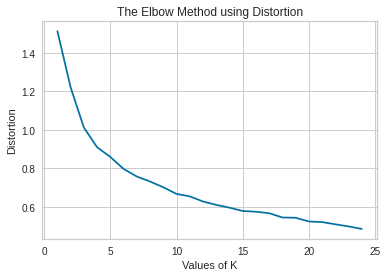

In [181]:
plt.plot(K, distortions) 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [182]:
from sklearn.metrics import silhouette_score, silhouette_samples
K = range(2,15) 

for k in K:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(data_scaled)
    centers = km.cluster_centers_

    score = silhouette_score(data_scaled, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.4346161965920348
For n_clusters = 3, silhouette score is 0.3893773329050905
For n_clusters = 4, silhouette score is 0.32158355428567903
For n_clusters = 5, silhouette score is 0.3020956645935218
For n_clusters = 6, silhouette score is 0.28415613827789493
For n_clusters = 7, silhouette score is 0.29104079819555734
For n_clusters = 8, silhouette score is 0.29857920252232445
For n_clusters = 9, silhouette score is 0.29503079649732006
For n_clusters = 10, silhouette score is 0.28770461446861456
For n_clusters = 11, silhouette score is 0.28461800346849225
For n_clusters = 12, silhouette score is 0.2881562931693843
For n_clusters = 13, silhouette score is 0.28566616955738977
For n_clusters = 14, silhouette score is 0.29198409101300116


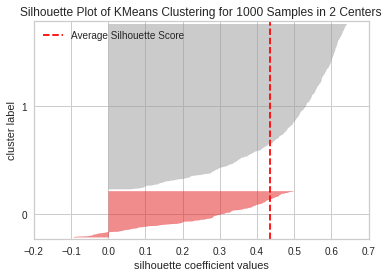

In [183]:
from yellowbrick.cluster import SilhouetteVisualizer

#Instantiate the clustering model and visualizer
km = KMeans (n_clusters=2)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(data_scaled) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

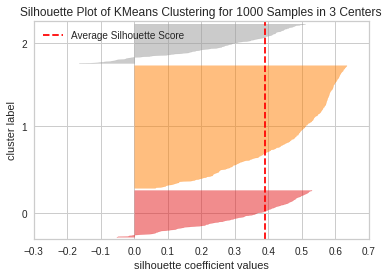

In [184]:
from yellowbrick.cluster import SilhouetteVisualizer

#Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(data_scaled) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

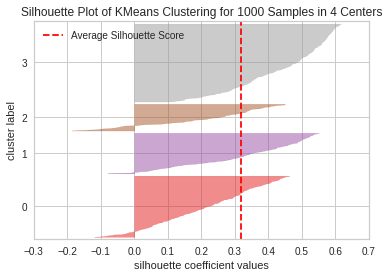

In [185]:
from yellowbrick.cluster import SilhouetteVisualizer

#Instantiate the clustering model and visualizer
km = KMeans (n_clusters=4)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(data_scaled) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [186]:
kmeanst3 = KMeans(n_clusters = 3, random_state=1)
kmeanst3.fit(data_scaled)
y_predt3 = kmeanst3.predict(data_scaled)
print(kmeanst3.cluster_centers_)

[[ 1.41654338 -0.30935278 -0.41938741]
 [-0.06942846  1.53770894  1.52430617]
 [-0.51820058 -0.37705616 -0.33075142]]


In [187]:
data["clusterT3"] = kmeanst3.labels_ 

In [188]:
cluster_sum = data.groupby('clusterT3')['Age','Credit amount', 'Duration'].mean()
cluster_sum

,Age,Credit amount,Duration
clusterT3,,,
0,51.651786,2398.473214,15.848214
1,34.756614,7609.634921,39.275132
2,29.654174,2207.459966,16.916525


In [189]:
cluster_sum = data.groupby('clusterT3')[ 'Credit amount', 'Age', 'Duration'].describe()
cluster_sum

Credit amount                                                     \
                  count         mean          std     min      25%     50%   
clusterT3                                                                    
0                 224.0  2398.473214  1829.532796   250.0  1239.75  1837.0   
1                 189.0  7609.634921  3179.869870  1845.0  5371.00  7166.0   
2                 587.0  2207.459966  1253.179955   276.0  1280.00  1934.0   

                               Age             ...             Duration  \
               75%      max  count       mean  ...   75%   max    count   
clusterT3                                      ...                        
0          2977.25  14896.0  224.0  51.651786  ...  57.0  75.0    224.0   
1          9277.00  18424.0  189.0  34.756614  ...  41.0  63.0    189.0   
2          2905.50   7472.0  587.0  29.654174  ...  34.0  41.0    587.0   

                                                              
                mean        std  min   25%   50%   75%   max  
clusterT3                                                     
0          15.848214   7.606594  4.0  11.0  12.0  24.0  42.0  
1          39.275132  10.701882  6.0  36.0  36.0  48.0  72.0  
2          16.916525   7.388409  4.0  12.0  15.0  24.0  39.0  

[3 rows x 24 columns]

Text(0.5, 0, 'Age')

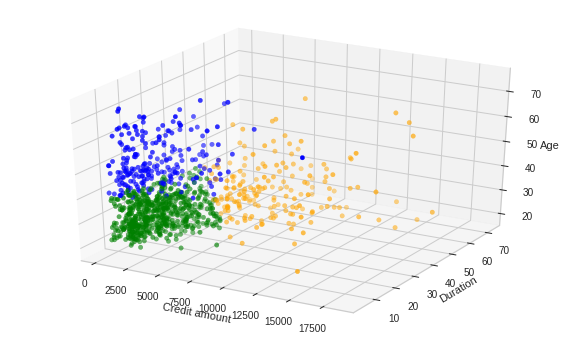

In [190]:
colors = {0:'blue', 1:'orange', 2:'green'}
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"], c=data['clusterT3'].map(colors), cmap='jet_r')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [191]:
fig = px.scatter(data, x='Age', y='Duration', color='clusterT3')
fig.show()


In [192]:
fig = px.scatter(data, x='Age', y='Credit amount', color='clusterT3')
fig.show()

In [193]:
fig = px.scatter(data, x='Duration', y='Credit amount', color='clusterT3')
fig.show()

In [194]:
cluster_size = data.groupby(['clusterT3'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,clusterT3,size,Percentage
0,0,224,0.224
1,1,189,0.189
2,2,587,0.587


In [195]:
# Plot pie chart
fig = px.pie(cluster_size, values='Percentage', names='clusterT3', 
             color_discrete_sequence=px.colors.sequential.RdBu, width=800, height=500,
            title='Size of Each Cluster')
fig.show()

In [196]:
clustert0 = data[data['clusterT3']==0]
clustert1 = data[data['clusterT3']==1]
clustert2 = data[data['clusterT3']==2]


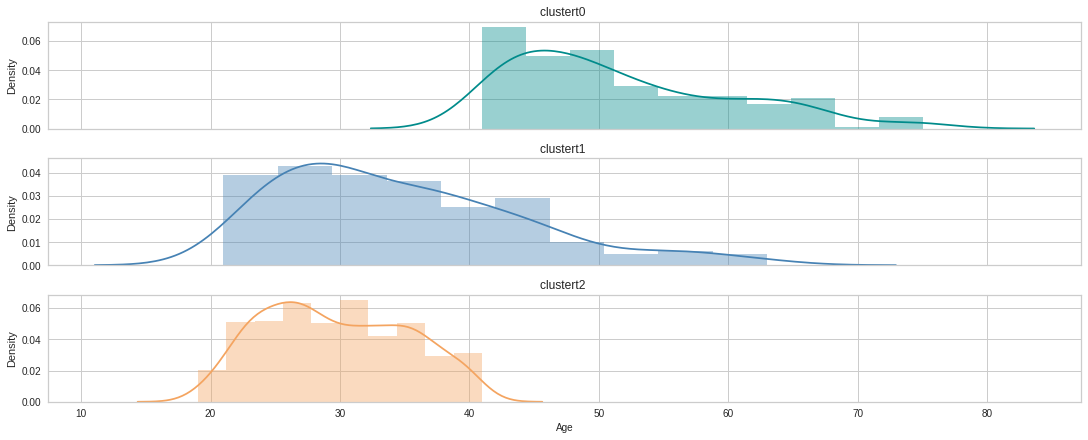

In [197]:
fig, ax = plt.subplots(3,1,figsize=(15,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('clustert0 ')
ax[1].title.set_text('clustert1 ')
ax[2].title.set_text('clustert2 ')


ax[0].axes.xaxis.set_visible(True)
ax[1].axes.xaxis.set_visible(True)
ax[2].axes.xaxis.set_visible(True)

plt.xlabel('Age', fontsize=10)
sns.distplot(clustert0['Age'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(clustert1['Age'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(clustert2['Age'], color='sandybrown', bins=10, ax=ax[2])



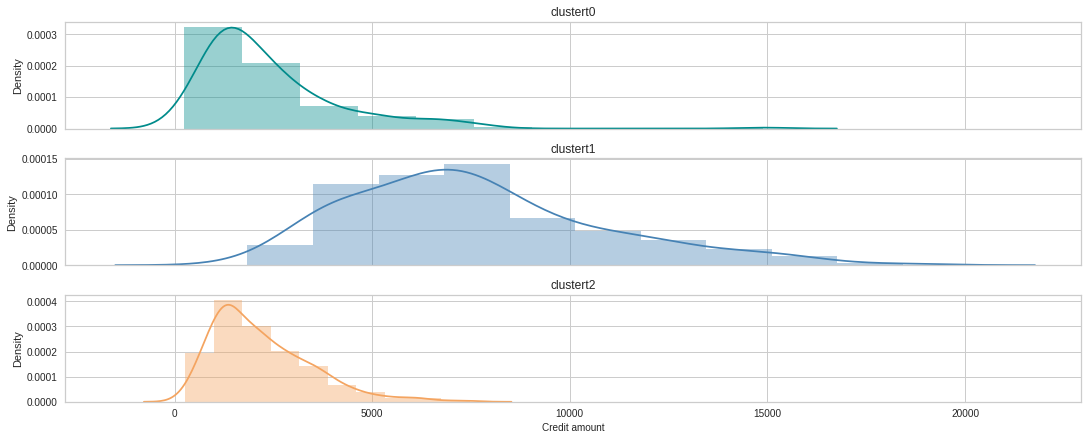

In [198]:
fig, ax = plt.subplots(3,1,figsize=(15,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('clustert0' )
ax[1].title.set_text('clustert1' )
ax[2].title.set_text('clustert2')


ax[0].axes.xaxis.set_visible(True)
ax[1].axes.xaxis.set_visible(True)
ax[2].axes.xaxis.set_visible(True)

plt.xlabel('Credit amount', fontsize=10)
sns.distplot(clustert0['Credit amount'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(clustert1['Credit amount'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(clustert2['Credit amount'], color='sandybrown', bins=10, ax=ax[2])


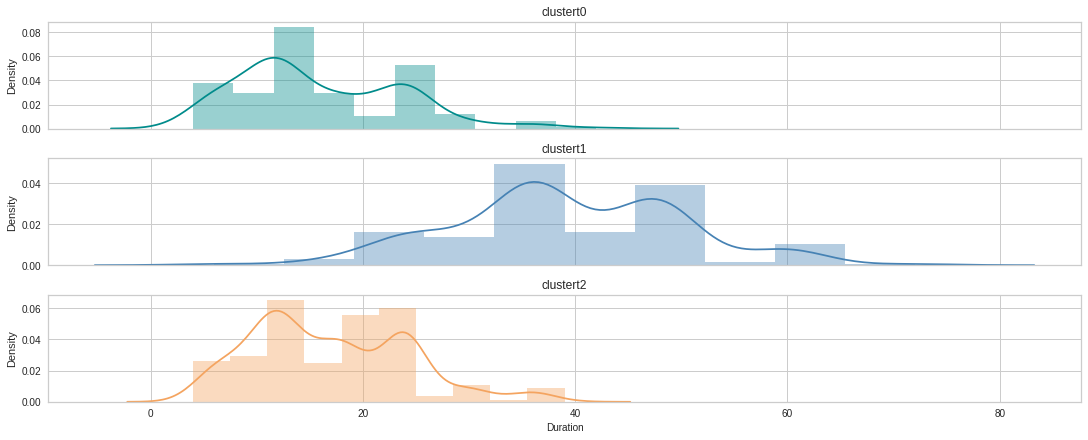

In [199]:
fig, ax = plt.subplots(3,1,figsize=(15,6), constrained_layout=True, sharex=True)
ax[0].title.set_text('clustert0' )
ax[1].title.set_text('clustert1' )
ax[2].title.set_text('clustert2' )


ax[0].axes.xaxis.set_visible(True)
ax[1].axes.xaxis.set_visible(True)
ax[2].axes.xaxis.set_visible(True)

plt.xlabel('Duration', fontsize=10)
sns.distplot(clustert0['Duration'], color='darkcyan', bins=10, ax=ax[0])
sns.distplot(clustert1['Duration'], color='steelblue', bins=10, ax=ax[1])
sns.distplot(clustert2['Duration'], color='sandybrown', bins=10, ax=ax[2])



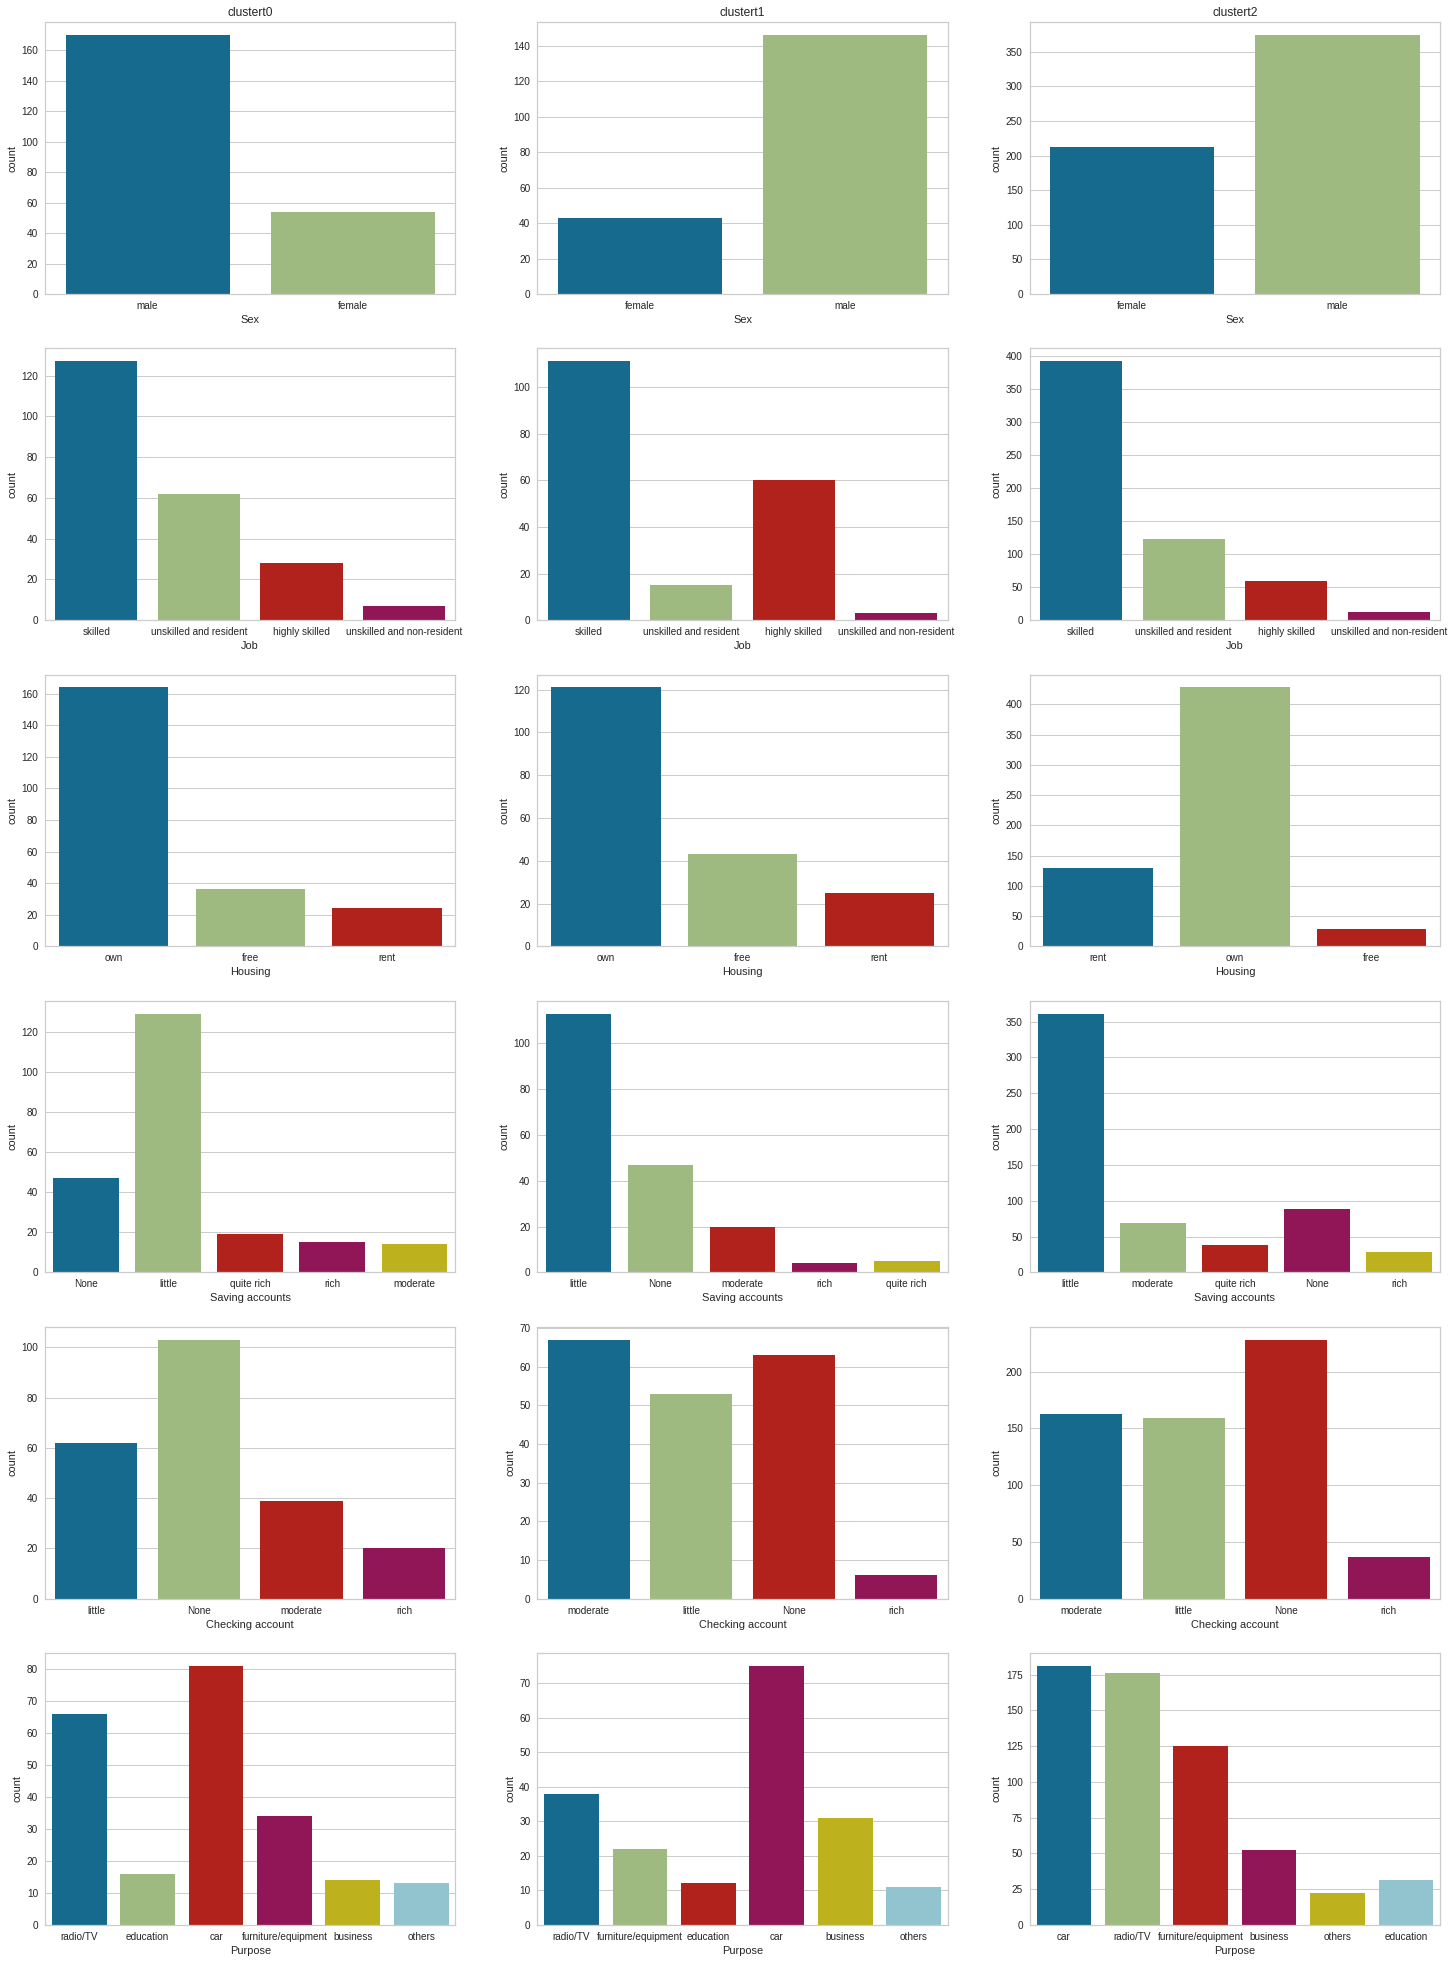

In [200]:
fig, ax = plt.subplots(6,3,figsize=(25,35))
ax[0][0].title.set_text('clustert0' )
ax[0][1].title.set_text('clustert1' )
ax[0][2].title.set_text('clustert2' )


sns.countplot(x ='Sex', data = data[data['clusterT3']==0], ax=ax[0][0])
sns.countplot(x ='Sex', data = data[data['clusterT3']==1], ax=ax[0][1])
sns.countplot(x ='Sex', data = data[data['clusterT3']==2], ax=ax[0][2])
sns.countplot(x ='Job', data = data[data['clusterT3']==0], ax=ax[1][0])
sns.countplot(x ='Job', data = data[data['clusterT3']==1], ax=ax[1][1])
sns.countplot(x ='Job', data = data[data['clusterT3']==2], ax=ax[1][2])
sns.countplot(x ='Housing', data = data[data['clusterT3']==0], ax=ax[2][0])
sns.countplot(x ='Housing', data = data[data['clusterT3']==1], ax=ax[2][1])
sns.countplot(x ='Housing', data = data[data['clusterT3']==2], ax=ax[2][2])
sns.countplot(x ='Saving accounts', data = data[data['clusterT3']==0], ax=ax[3][0])
sns.countplot(x ='Saving accounts', data = data[data['clusterT3']==1], ax=ax[3][1])
sns.countplot(x ='Saving accounts', data = data[data['clusterT3']==2], ax=ax[3][2])
sns.countplot(x ='Checking account', data = data[data['clusterT3']==0], ax=ax[4][0])
sns.countplot(x ='Checking account', data = data[data['clusterT3']==1], ax=ax[4][1])
sns.countplot(x ='Checking account', data = data[data['clusterT3']==2], ax=ax[4][2])
sns.countplot(x ='Purpose', data = data[data['clusterT3']==0], ax=ax[5][0])
sns.countplot(x ='Purpose', data = data[data['clusterT3']==1], ax=ax[5][1])
sns.countplot(x ='Purpose', data = data[data['clusterT3']==2], ax=ax[5][2])

plt.show()

In [201]:
#print(data.head())
def get_data(data):
    out = data.value_counts().reset_index()
    return(out)

In [202]:
#Assign the color according to cluster
def plot(a):
    fig = go.Figure()
    fig.add_trace(go.Bar(x=get_data(clustert0[a])['index'], y=get_data(clustert0[a])[a], name='cluster 0',
                         marker_color='blue' ))
    
    fig.add_trace(go.Bar(x=get_data(clustert1[a])['index'], y=get_data(clustert1[a])[a], name='cluster 1',
                         marker_color='orange' ))
    
    fig.add_trace(go.Bar(x=get_data(clustert2[a])['index'], y=get_data(clustert2[a])[a], name='cluster 2',
                         marker_color='green' ))
    

    fig.update_layout(barmode='group', xaxis_tickangle=45, title=a)
    fig.show()

In [203]:
import plotly.graph_objs as go
plot('Sex')

In [204]:
plot('Job')

In [205]:
plot('Housing')

In [206]:
plot('Saving accounts')

In [207]:
plot('Checking account')

In [208]:
plot('Purpose')